# **------------------**>**MOVIE REVIEWS CLASSIFICATION PROJECT**<**------------------**

# 1. Data Loading

In [56]:
# 1. Data Loading
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

# Load labeledTrainData.tsv
labeled_train = pd.read_csv(
    r"D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\TECHNOHACKS SOLUTIONS - MACHINE LEARNING ENGINEERING\Movie Reviews classification Project\word2vec-nlp-tutorial\labeledTrainData.tsv\labeledTrainData.tsv", 
    delimiter='\t', 
    encoding="utf-8"
)

# Load testData.tsv
test_data = pd.read_csv(
    r"D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\TECHNOHACKS SOLUTIONS - MACHINE LEARNING ENGINEERING\Movie Reviews classification Project\word2vec-nlp-tutorial\testData.tsv\testData.tsv", 
    delimiter='\t', 
    encoding="utf-8"
)

# Print the first few rows of the labeled_train DataFrame
print("Labeled Train Data Head:")
print(labeled_train.head())

# Print the first few rows of the test_data DataFrame
print("\nTest Data Head:")
print(test_data.head())


Labeled Train Data Head:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...

Test Data Head:
         id                                             review
0  12311_10  Naturally in a film who's main themes are of m...
1    8348_2  This movie is a disaster within a disaster fil...
2    5828_4  All in all, this is a movie for kids. We saw i...
3    7186_2  Afraid of the Dark left me with the impression...
4   12128_7  A very accurate depiction of small time mob li...


# 2. Data Preprocessing

In [35]:
# 2. Data Preprocessing
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

# Check for missing values and drop them if any
if labeled_train.isnull().sum().any():
    labeled_train.dropna(inplace=True)

# Ensure you have the necessary NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.strip()  # Remove leading/trailing whitespaces
    return text

# Tokenization and Stopwords Removal
def preprocess_text(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
labeled_train['cleaned_review'] = labeled_train['review'].apply(preprocess_text)

# Extract features and target variable
X = labeled_train['cleaned_review']
y = labeled_train['sentiment']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ENGHK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ENGHK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 3. Exploratory Data Analysis (EDA)

Missing values in the dataset:
id           0
sentiment    0
review       0
dtype: int64

Basic statistics of the dataset:
         sentiment
count  25000.00000
mean       0.50000
std        0.50001
min        0.00000
25%        0.00000
50%        0.50000
75%        1.00000
max        1.00000


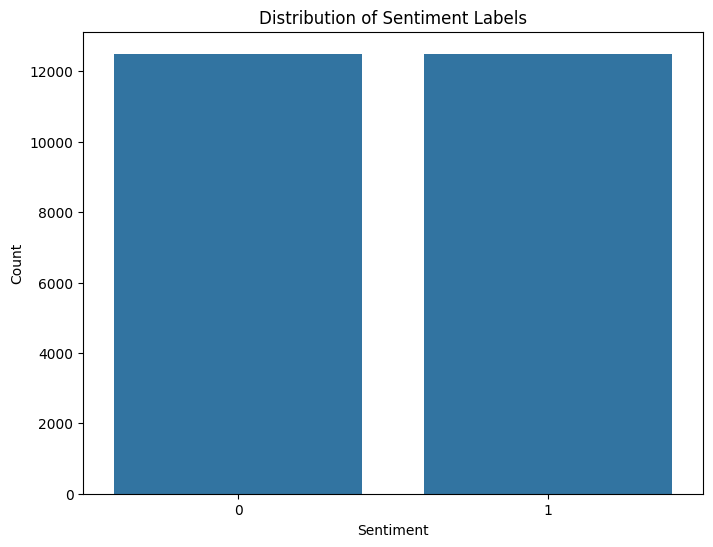

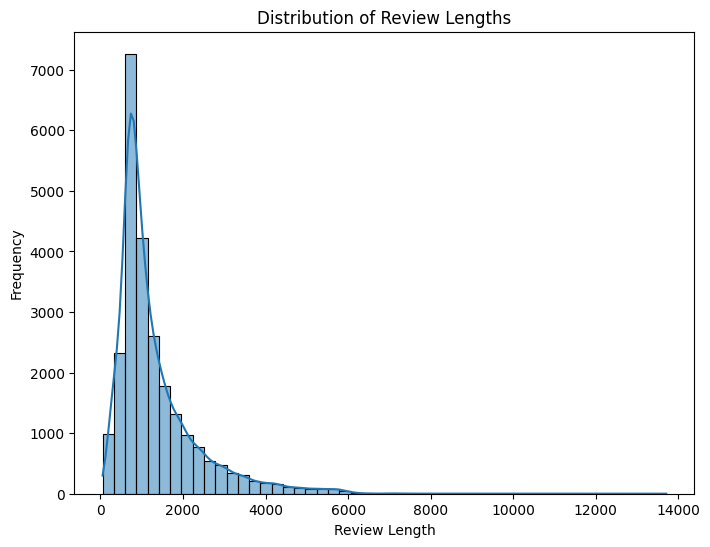


Sample reviews:
                                              review  sentiment
0  With all this stuff going down at the moment w...          1
1  \The Classic War of the Worlds\" by Timothy Hi...          1
2  The film starts with a manager (Nicholas Bell)...          0
3  It must be assumed that those who praised this...          0
4  Superbly trashy and wondrously unpretentious 8...          1


In [58]:
# 3. Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing values in the dataset:")
print(labeled_train.isnull().sum())

# Display basic statistics
print("\nBasic statistics of the dataset:")
print(labeled_train.describe())

# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=labeled_train)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Length of reviews (optional EDA)
labeled_train['review_length'] = labeled_train['review'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(labeled_train['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Sample reviews for a closer look
print("\nSample reviews:")
print(labeled_train[['review', 'sentiment']].head())


# 4. Feature Engineering

In [37]:
# 4. Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization with n-grams
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Using bi-grams
X_tfidf = tfidf_vectorizer.fit_transform(X)


# 5. Model Training

In [38]:
# 5. Model Training
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize classifiers
rf_clf = RandomForestClassifier(n_estimators=300, random_state=42)
svm_clf = SVC(probability=True)  # Enable probability estimates
log_reg_clf = LogisticRegression()

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('svm', svm_clf), ('log_reg', log_reg_clf)], voting='soft')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=300,
                                                     random_state=42)),
                             ('svm', SVC(probability=True)),
                             ('log_reg', LogisticRegression())],
                 voting='soft')

# 6. Evaluation

In [39]:
# 6. Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score

# Predict on the validation set
y_pred = voting_clf.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate F1-score
f1 = f1_score(y_val, y_pred)
print(f'F1 Score: {f1:.2f}')

# Print classification report
print(classification_report(y_val, y_pred))


Accuracy: 0.89
F1 Score: 0.89
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2481
           1       0.88      0.90      0.89      2519

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



# 7. Visualization of Results

### 7.1 Confusion Matrix

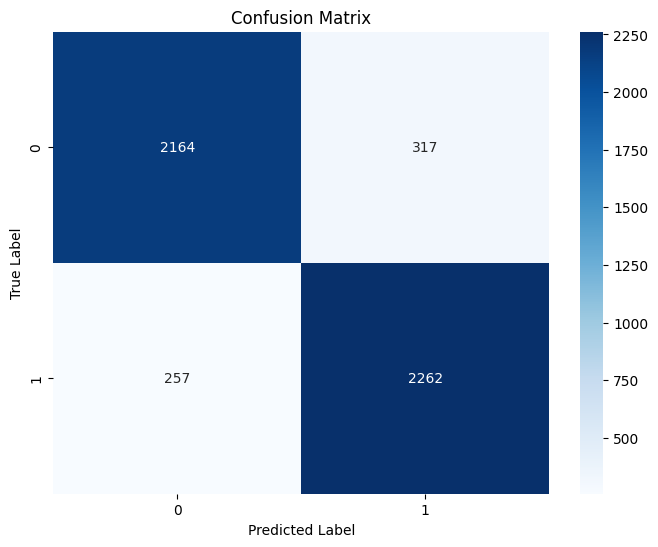

In [43]:
# 7.1 Confusion Matrix

from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 7.2 ROC Curve and AUC

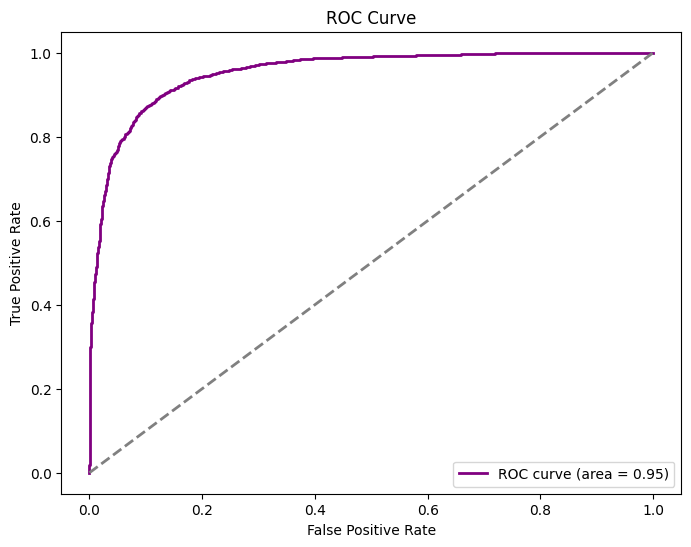

In [63]:
# 7.2 ROC Curve and AUC

y_pred_proba = voting_clf.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # Changed color to purple
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Changed color to gray
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### 7.3 Distribution of Predicted Probabilities

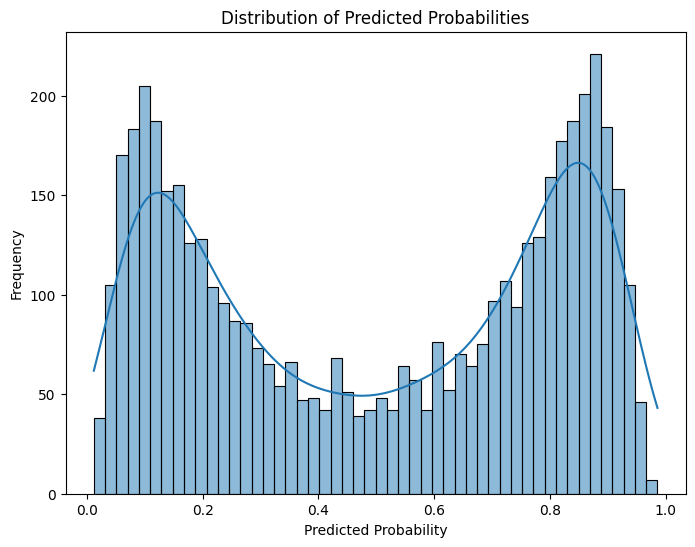

In [77]:
# 7.3 Distribution of Predicted Probabilities

# Plot Distribution of Predicted Probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, bins=50, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


### 7.4 Precision-Recall Curve

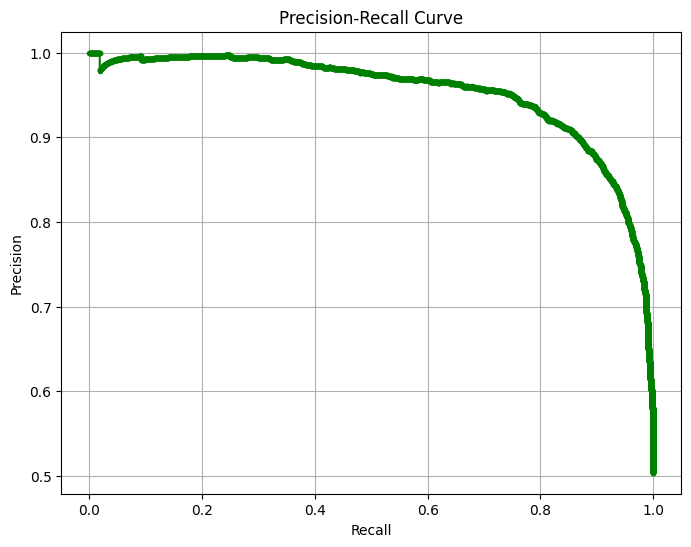

In [68]:
# 7.4 Precision-Recall Curve

from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='green')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


### 7.5 Distribution of Predicted Probabilities by Class

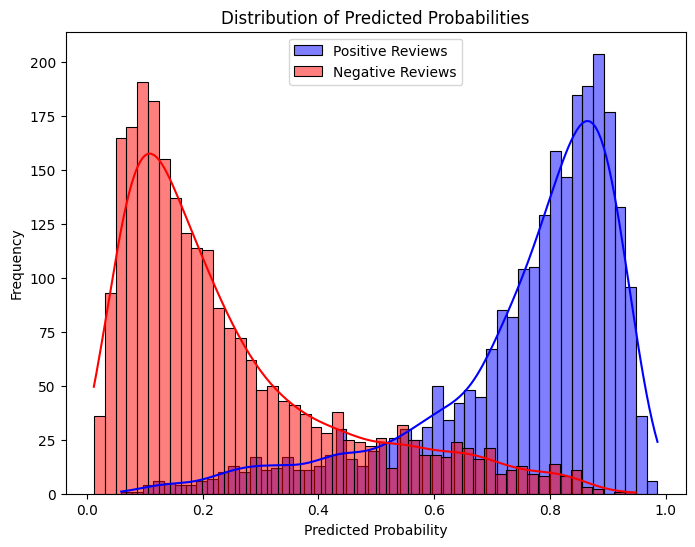

In [69]:
# 7.5 Distribution of Predicted Probabilities by Class

# Plot Distribution of Predicted Probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba[y_val == 1], bins=50, kde=True, color='blue', label='Positive Reviews')
sns.histplot(y_pred_proba[y_val == 0], bins=50, kde=True, color='red', label='Negative Reviews')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()
